In [1]:
%load_ext autoreload

%autoreload 2

import gauleg as gl 
import sympy as sp 
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import math

In [4]:
# initial variables 

a = 0 
b = 1 
l = 2 # for a 4 slot problem 
h = 2 **(-l) # distance between xi, xi+1 is 1 * 2**-l 
n1 = 2**l + 1 # number of nodes 

n2 = 5 # number of roots in each GL 
ijlist = list(range(2**l-1))

dim = 2**l -1 # number of phi functions i have for l 

### sanity check ###
"""
if l = 2 i expect to have 4 slots and 3 functions and 5 points 
2**l = 2**2 = 4 --> [a = x0,x1,x2,x3,x4 = b]
dim of matrix = 3 = 2**2 -1 
gradient = 1 / 2**-l 
n1 = 5  --> number of points 
"""


x_list = gl.listi(a,b,h,n1)
print(x_list)


a = gl.a(0.25)
print(a)

matrix = sp.zeros(dim, dim)
print(matrix)






[0.0, 0.25, 0.5, 0.75, 1.0]
0.24740395925452294
Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])


In [6]:
gl.phiij(numofnodes=5, i=0, j =1 , l = l , xlist=x_list)

-11.5

In [7]:
matrix = gl.matrix(ijlist=ijlist, matrix=matrix, n1=n1, l=l, xlist=x_list )
matrix

Matrix([
[ 18.0, -11.5,     0],
[-11.5,  28.0, -16.5],
[    0, -16.5,  38.0]])

In [5]:
F_empty = sp.zeros(dim,1)


In [7]:
def intergrand(numofnodes, i, l, xlist, f, ci, xi, n2):
    def phi_j(numofnodes, i, l, k):
        def phi_j_function(s):
            if k == i:
                return 2**l * (s - (i / 2**l))
            elif k == i + 1:
                return -(2**l * (s - ((i + 2) / 2**l)))
            else:
                return 0
        return phi_j_function

    finalsum = 0
    for k in range(numofnodes-1):
        phi_j_func = phi_j(numofnodes, i, l, k)
        x = xlist[k]
        y = xlist[k+1]
        sum = 0
        for j in range(n2):
            s = 0.5 * ((y - x) * xi[j] + (y + x))
            h = f(s) * phi_j_func(s)
            prod = ci[j] * h
            sum += prod
        onegl = (y - x) / 2 * sum
        finalsum += onegl

    return finalsum

def finding_F(F_empty):
    xi = gl.gauleg(n2)[0]
    ci = gl.gauleg(n2)[1]
    for i in ijlist:
        Fj = intergrand(numofnodes=n1, i = i, l = l, xlist=x_list, f= gl.f, ci=ci, xi = xi, n2 = n2)
        F_empty[i,0] = Fj 
    return F_empty

F = finding_F(F_empty=F_empty)
F

Matrix([
[0.0976721422851887],
[ 0.101614613565613],
[ 0.105572297711837],
[ 0.109537528133901],
[ 0.113502642028908],
[ 0.117459991565299],
[ 0.121401955037992],
[ 0.125320947979908],
[ 0.129209434215442],
[ 0.133059936841517],
[ 0.136865049121984],
[ 0.140617445281192],
[ 0.144309891182735],
[ 0.147935254879495],
[ 0.151486517021269],
[ 0.154956781106477],
[  0.15833928356459],
[ 0.161627403656198],
[ 0.164814673177802],
[ 0.167894785958719],
[ 0.170861607137686],
[ 0.173709182207101],
[ 0.176431745813045],
[ 0.179023730299608],
[ 0.181479773986317],
[ 0.183794729167808],
[ 0.185963669825235],
[ 0.187981899039264],
[ 0.189844956094871],
[ 0.191548623268546],
[ 0.193088932288906]])

In [13]:
def inv(matrix, F):  
    a_inv = matrix.inv()
    c = a_inv * F
    return c



In [14]:
def approx_new(ijlist, c, F):
    approx_new = 0 
    for i in ijlist : 
        prod = c[i] * F[i]
        approx_new = approx_new + prod
    return approx_new
approx_new(ijlist=ijlist, c = inv(matrix= matrix, F = F), F=F)


0.813866069205034

In [16]:
def error_l():
    errors = []
    actual = 0.8146667469752307
    l_list = list(range(11))
    for l in l_list:
        n1 = 2**l + 1
        ijlist = list(range(2**l - 1))
        x_list = gl.listi(a, b, h, n1)
        dim = 2**l -1
        matrixF = sp.zeros(dim, 1)
        matrixA= sp.zeros(dim, dim)
        A = gl.matrix(ijlist=ijlist, matrix=matrixA, n1=n1, l=l, xlist=x_list)
        F = finding_F(F_empty=matrixF)
        c = inv(matrix=A, F=F)
        approximation = approx_new(ijlist=ijlist, c=c, F=F)
        
        error = actual - approximation
        abserr = abs(error)
        logerror = math.log(abserr)
        errors.append({'l': l, 'log error': logerror, 'error': error})

    # Convert the list of errors to a DataFrame
    df_errors = pd.DataFrame(errors)
    return df_errors
dataframe = error_l()

    



IndexError: Index out of range: a[0]

In [97]:
dataframe

,l,log error,error
0,0,8.614178,-5509.21592814754
1,1,7.227440,-1376.69298197665
2,2,5.839368,-343.562245433932
3,3,4.445935,-85.2795612982516
4,4,3.030563,-20.7088902643315
5,5,1.518686,-4.56622250585145
6,6,-0.633831,-0.530555566231439
7,7,-0.737389,0.478361168673563
8,8,-0.313902,0.730590352399814
9,9,-0.231116,0.793647648331376


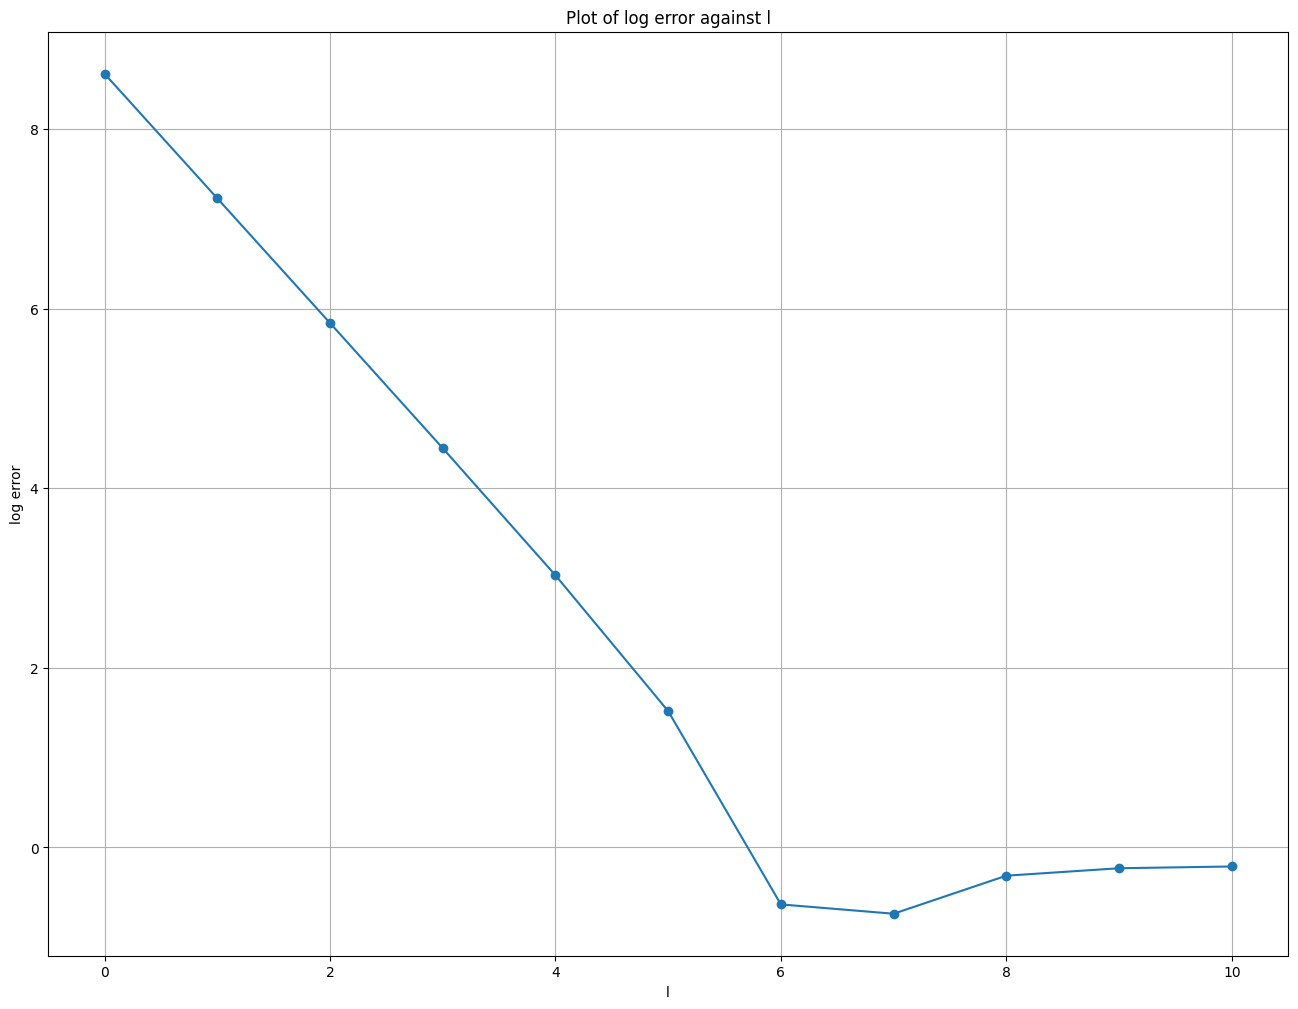

In [91]:
plt.figure(figsize=(16, 12))
plt.plot(dataframe['l'], dataframe['log error'], marker='o', linestyle='-')
plt.xlabel('l')
plt.ylabel('log error')
plt.title('Plot of log error against l')
plt.grid(True)
plt.show()
